In [209]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from snntorch import spikeplot as splt
import os

File level2_loss0_epoch500_batch39.npz not found.


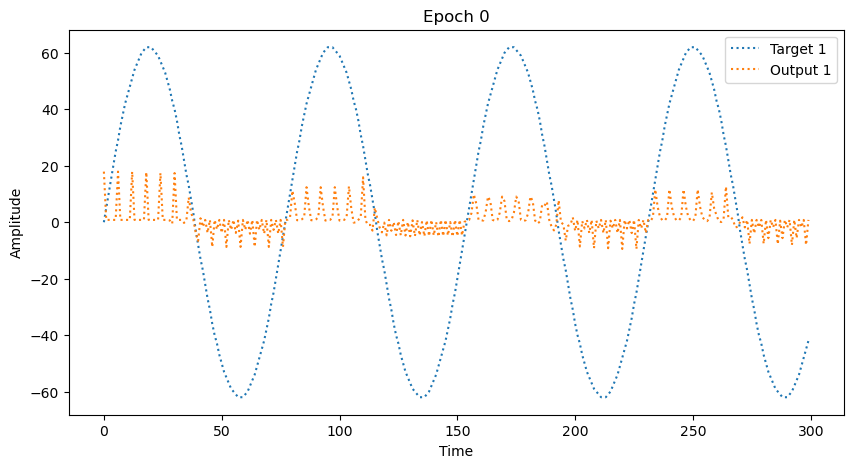

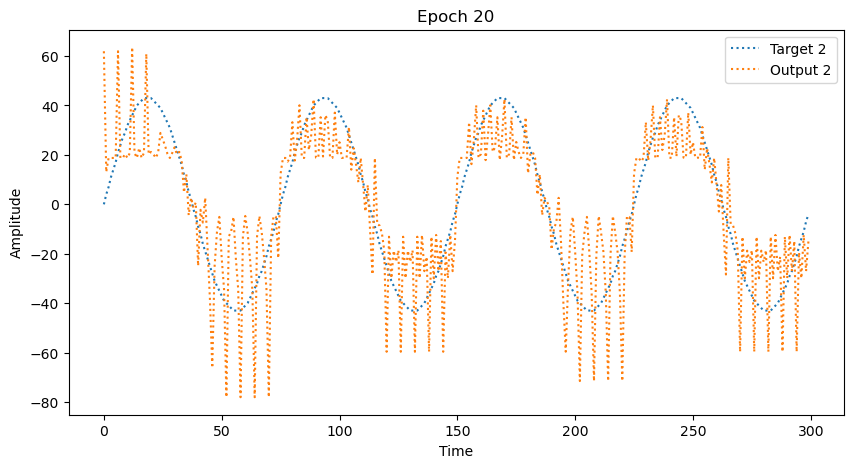

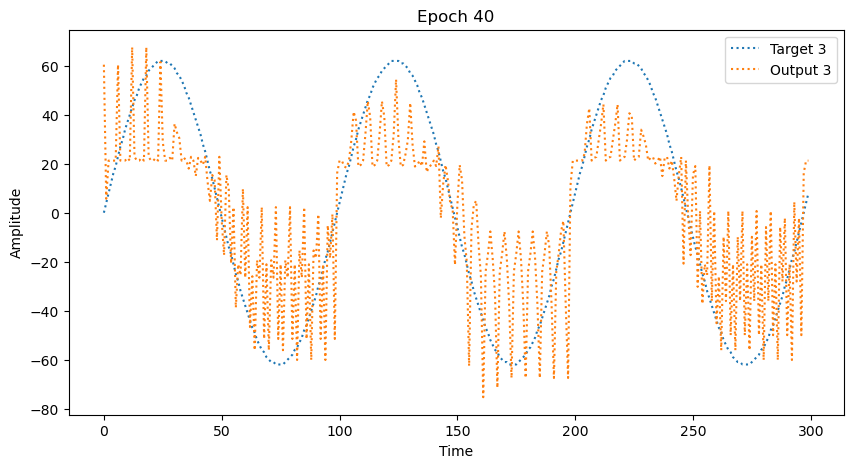

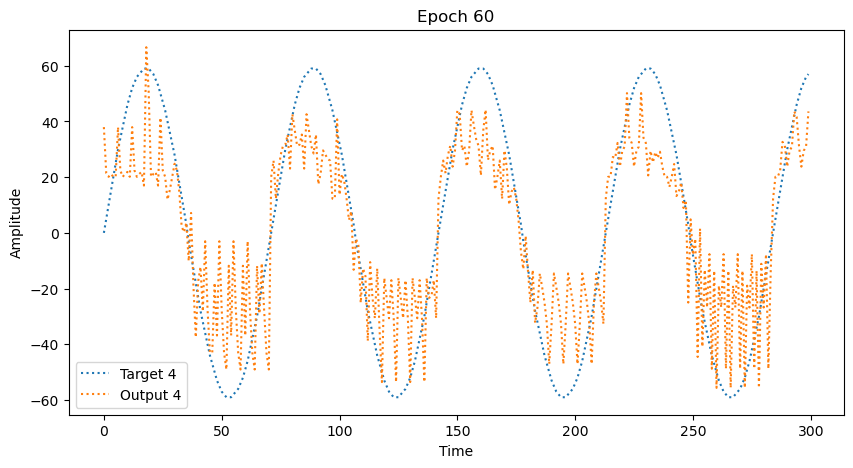

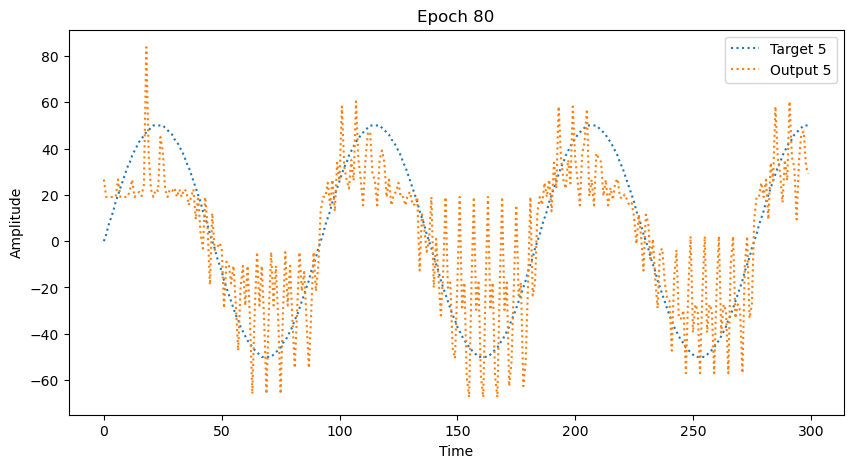

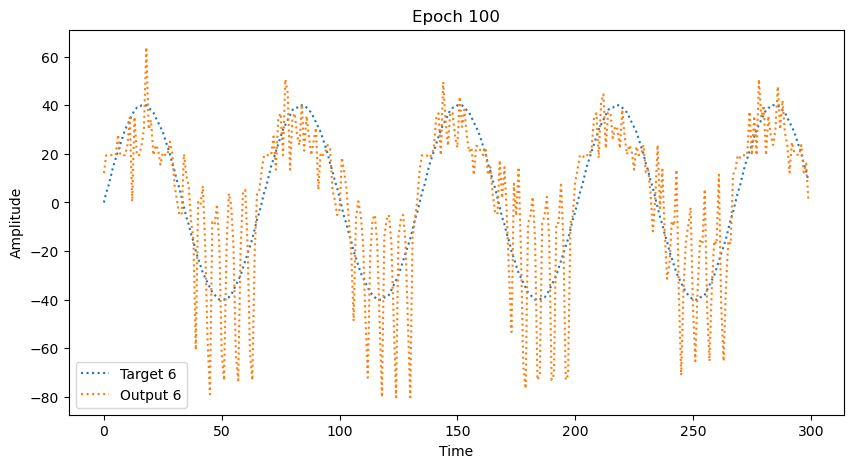

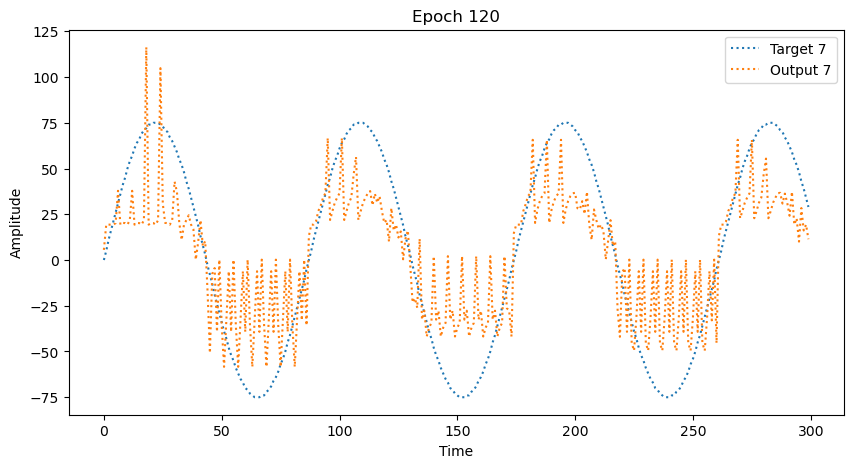

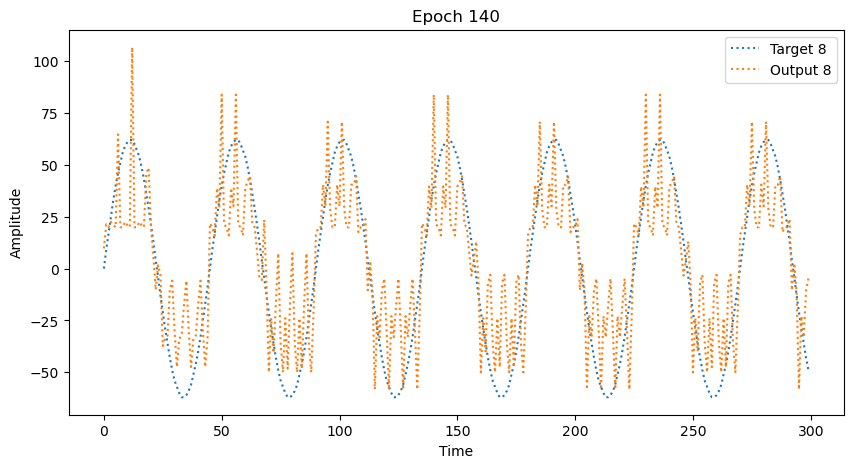

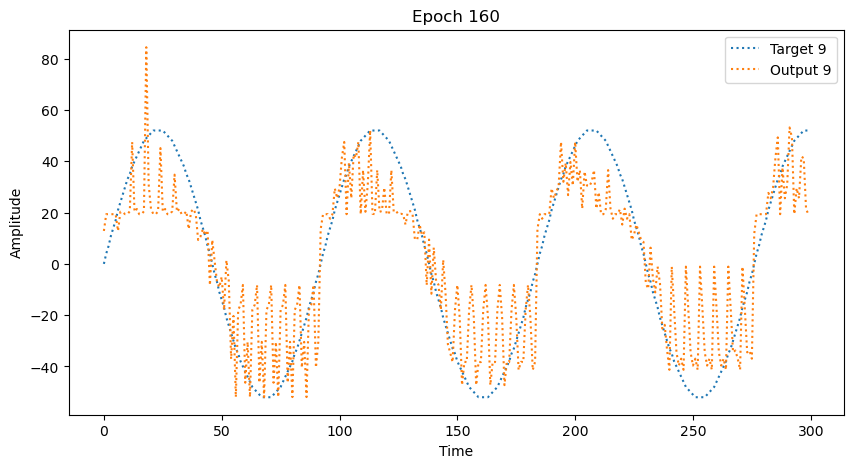

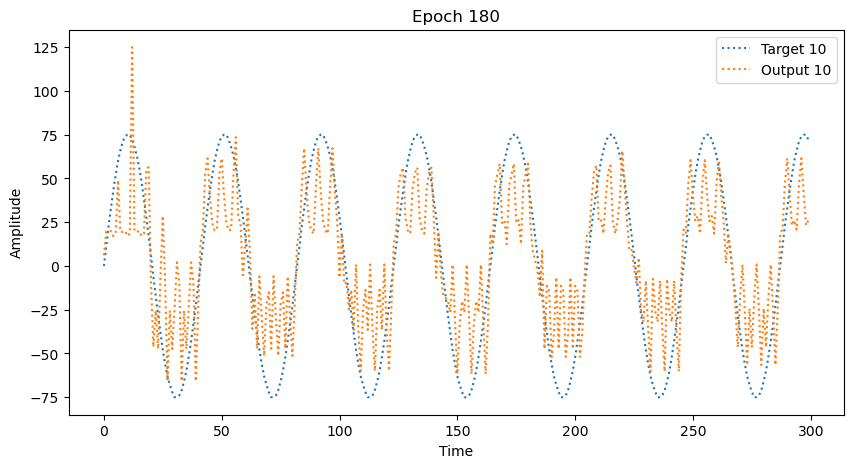

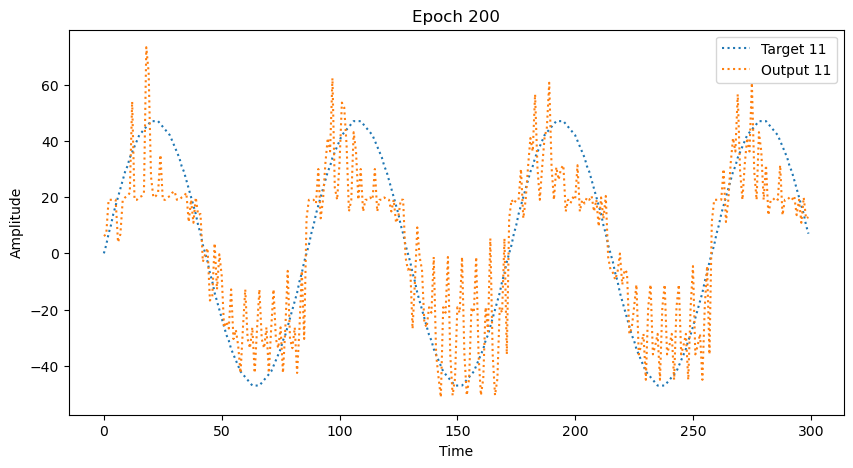

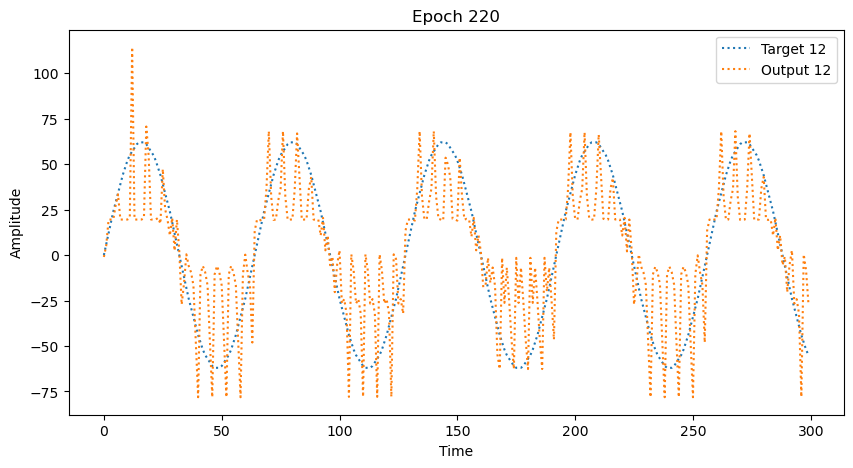

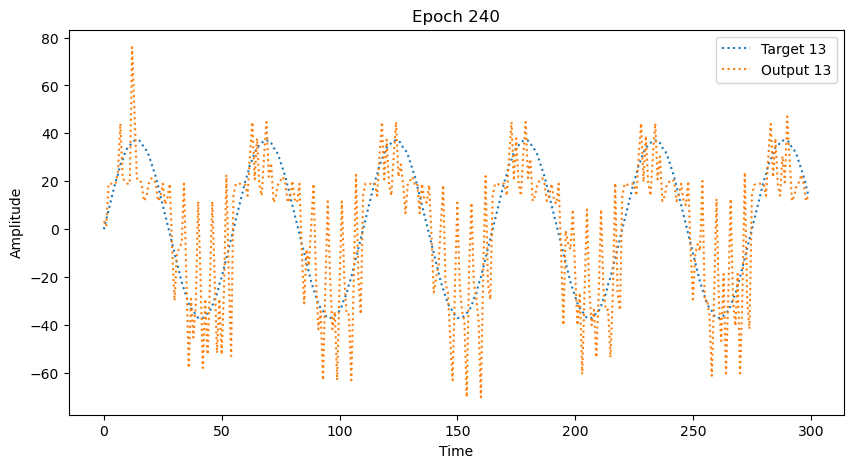

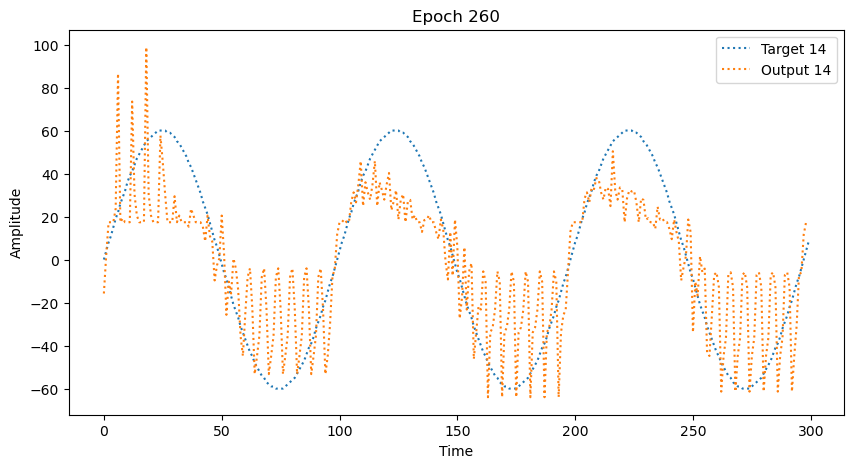

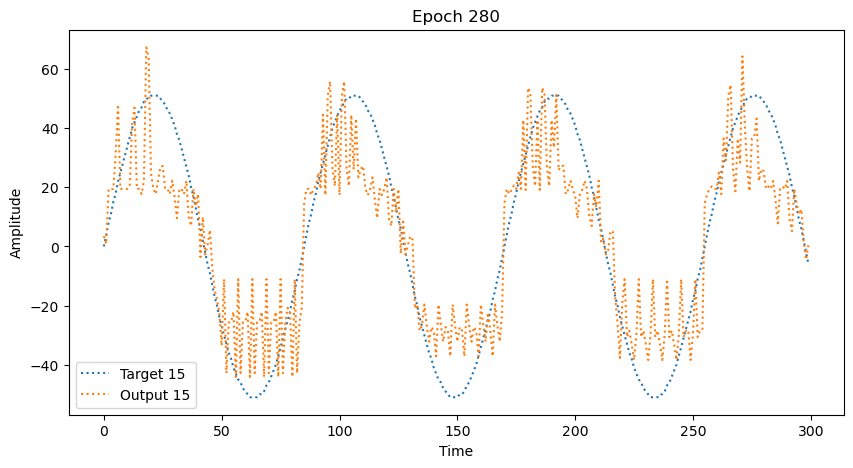

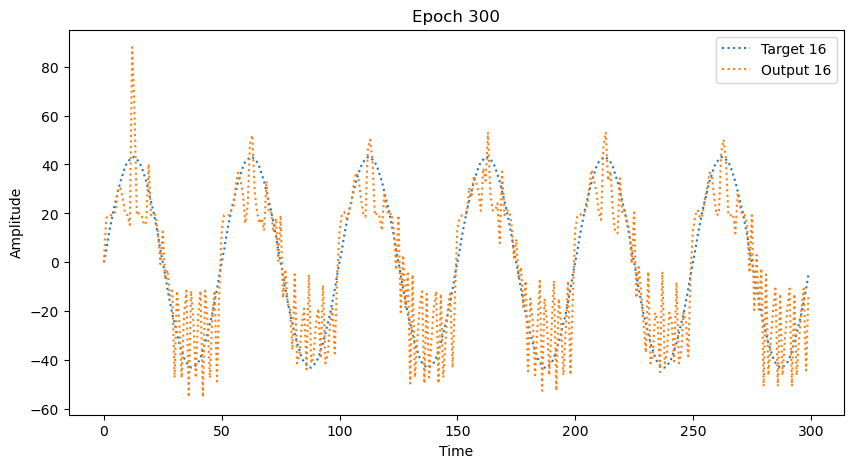

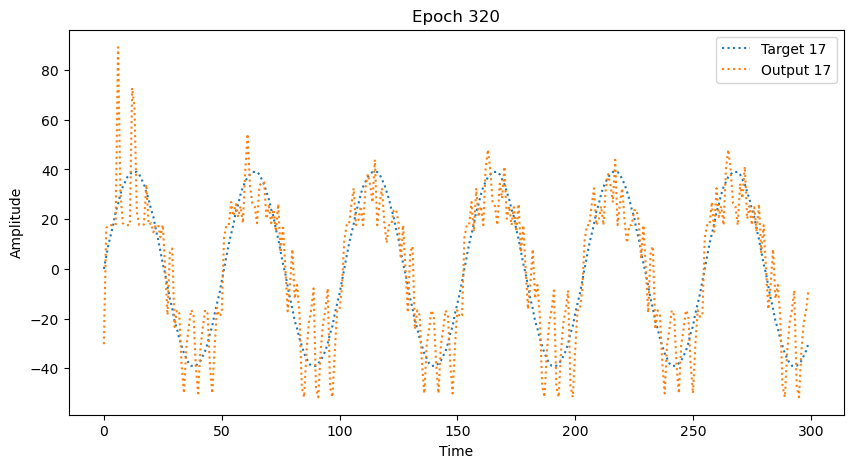

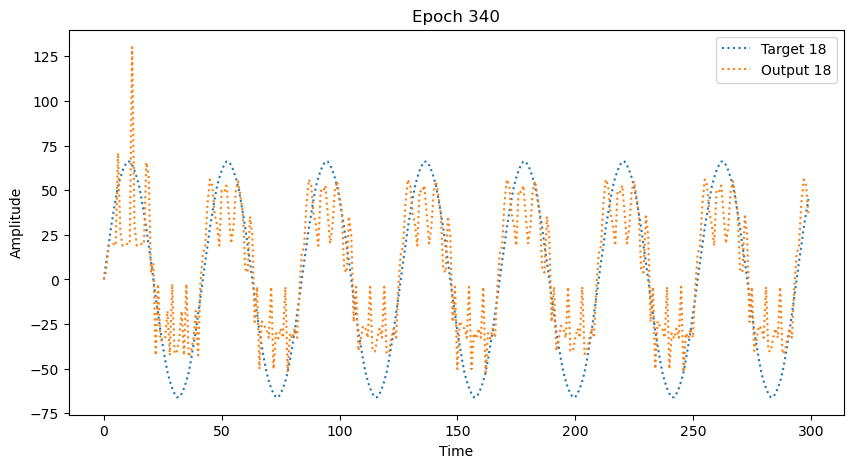

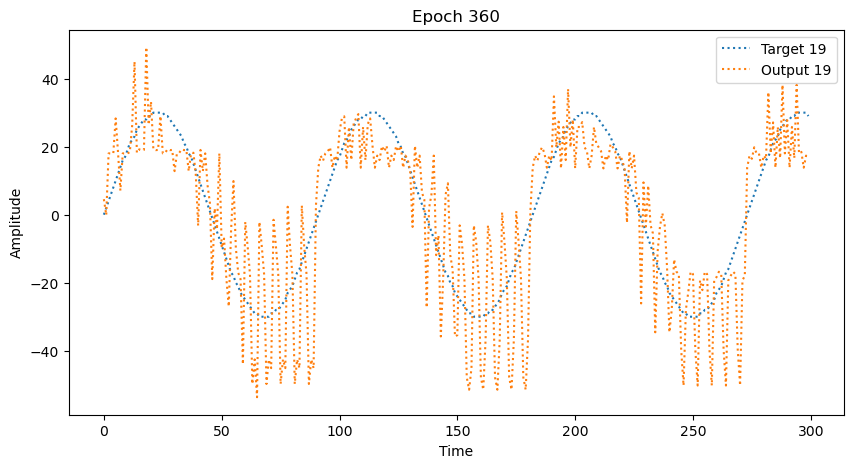

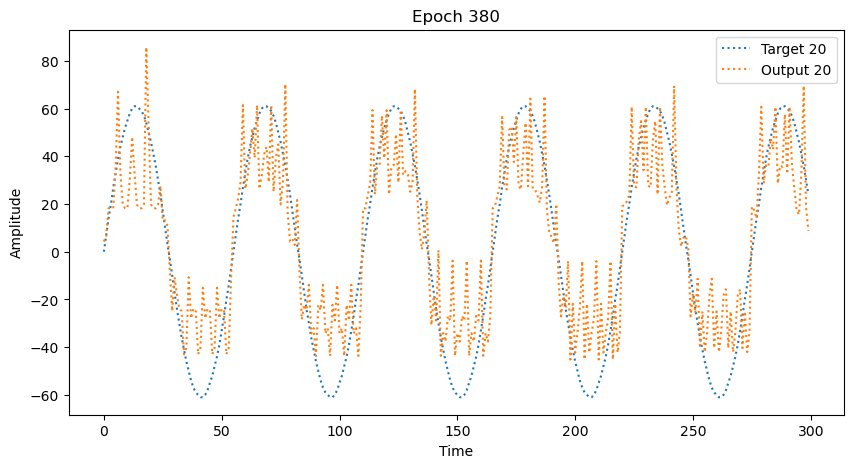

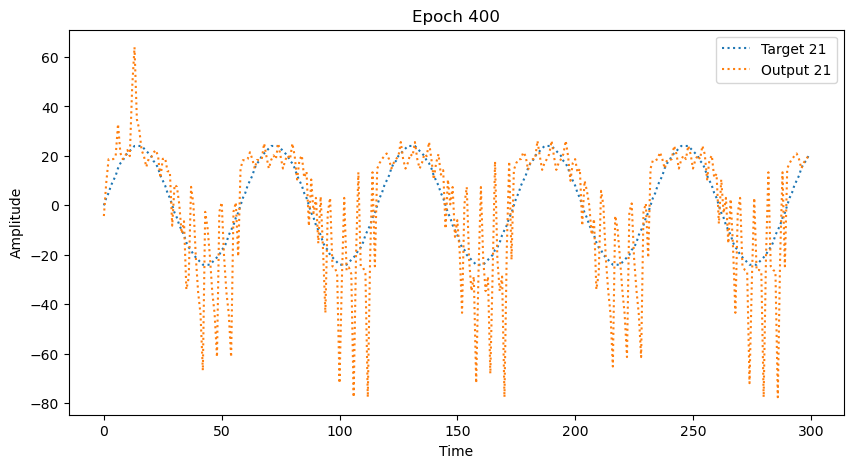

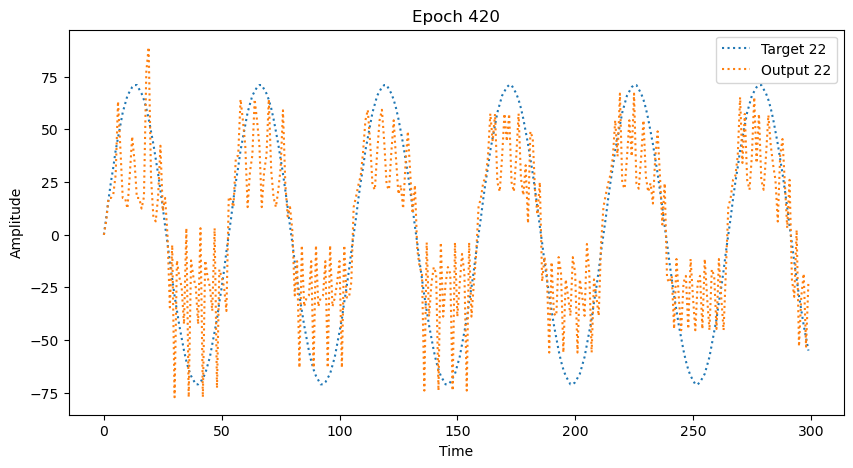

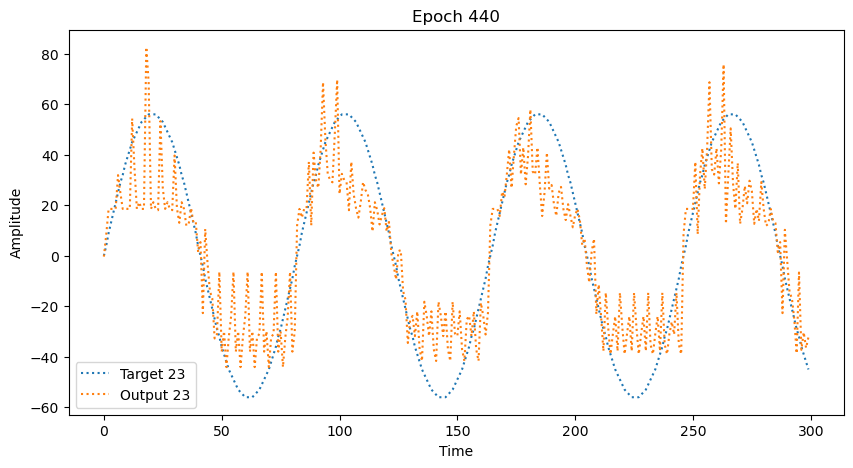

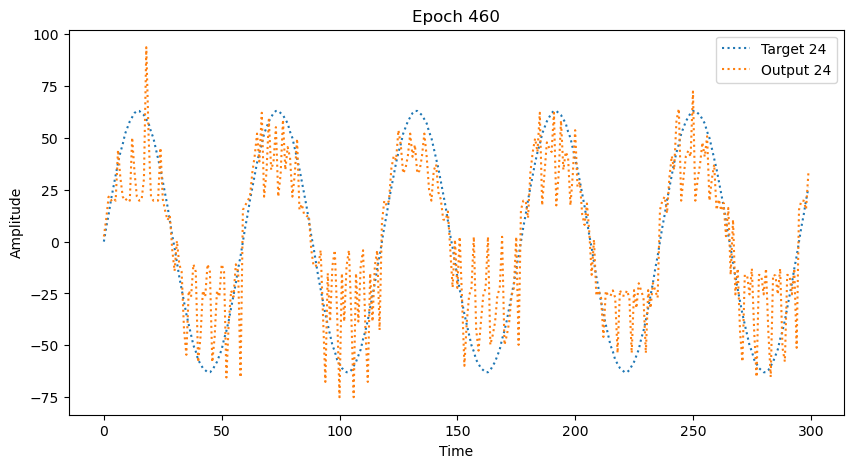

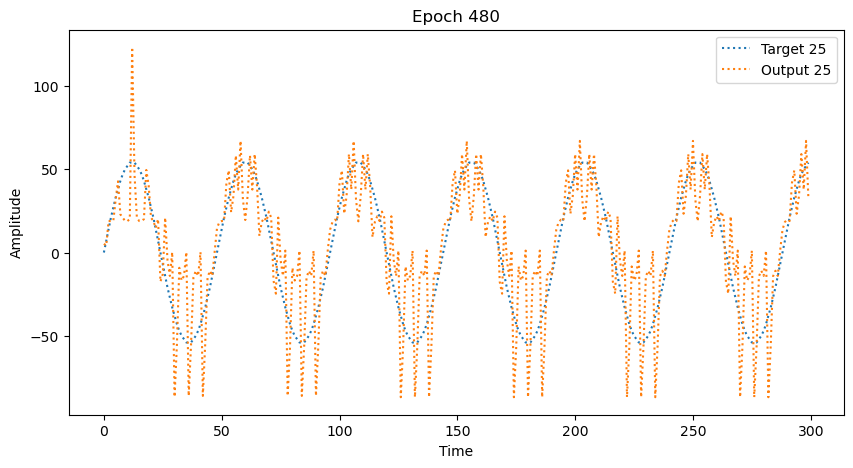

No data for epoch 500.


In [391]:
'''Plots the output-target sine wave pairs for each 20th epoch'''

# Directory containing the NPZ files
data_dir = 'dataMP'

# Epochs of interest (0, 20, 40, ..., 400)
epochs = range(0, 501, 20)
batch = 39

# Initialize lists to hold target and output data for each epoch
targets_list = []
outputs_list = []

# Load data from NPZ files
for epoch in epochs:
    file_name = f'level2_loss0_epoch{epoch}_batch{batch}.npz'
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        targets = data['targets'][24]
        outputs = data['outputs'][24]
        
        # Assuming targets and outputs are of shape (25, ...)
        targets_list.append(targets)
        outputs_list.append(outputs)
    else:
        print(f"File {file_name} not found.")

# Plotting the target and output sine waves for each epoch
for i, epoch in enumerate(epochs):
    if i < len(targets_list):
        targets = targets_list[i]
        outputs = outputs_list[i]
        
        plt.figure(figsize=(10, 5))
        plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
        plt.plot(outputs, linestyle='dotted', label=f'Output {i+1}')
        
        plt.title(f'Epoch {epoch}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"No data for epoch {epoch}.")


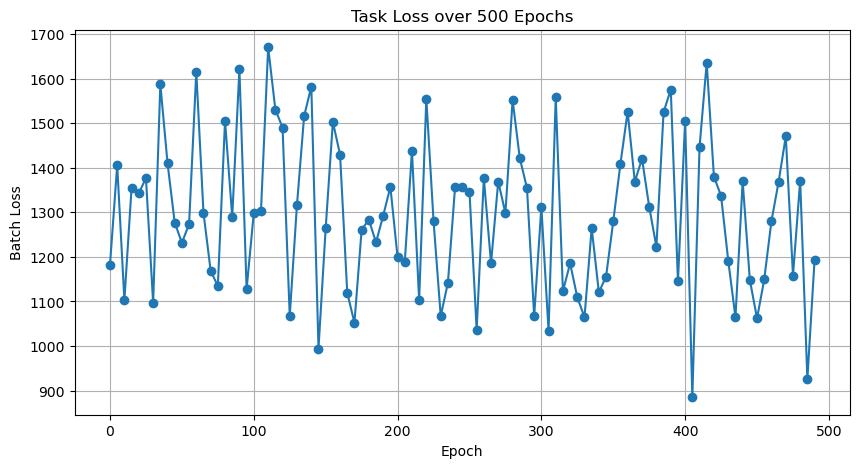

In [389]:
'''Plots the loss between 0-500th epochs'''

# Directory containing the NPZ files
data_dir = 'dataMP'

# Initialize lists to hold the epoch numbers and batch loss values
epochs = range(0, 500, 5)  # Since epochs are recorded every 5 epochs
batch_loss_values = []

# Load batch loss data from NPZ files
for epoch in epochs:
    file_name = f'level3_loss0_epoch{epoch}_batch39.npz'  # Assuming batch 0 is representative
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        batch_loss = data['task_loss']
        batch_loss_values.append(batch_loss)
    else:
        print(f"File {file_name} not found.")
        batch_loss_values.append(None)
batch_loss_values = batch_loss_values[1:]
# Remove None values and corresponding epochs if any file was not found
epochs = [epoch for epoch, loss in zip(epochs, batch_loss_values) if loss is not None]
batch_loss_values = [loss for loss in batch_loss_values if loss is not None]

# Plotting the batch loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, batch_loss_values, marker='o')
plt.title('Task Loss over 500 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Batch Loss')
plt.grid(True)
plt.show()


File level7_loss0_epoch500_batch39.npz not found.


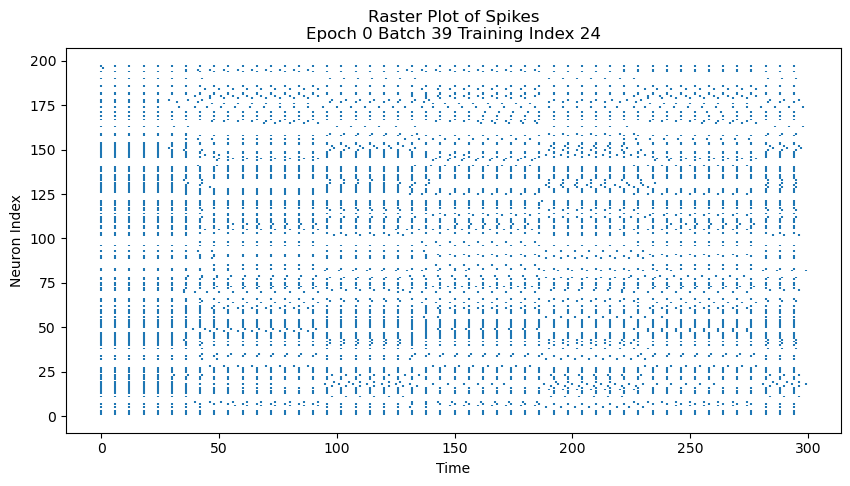

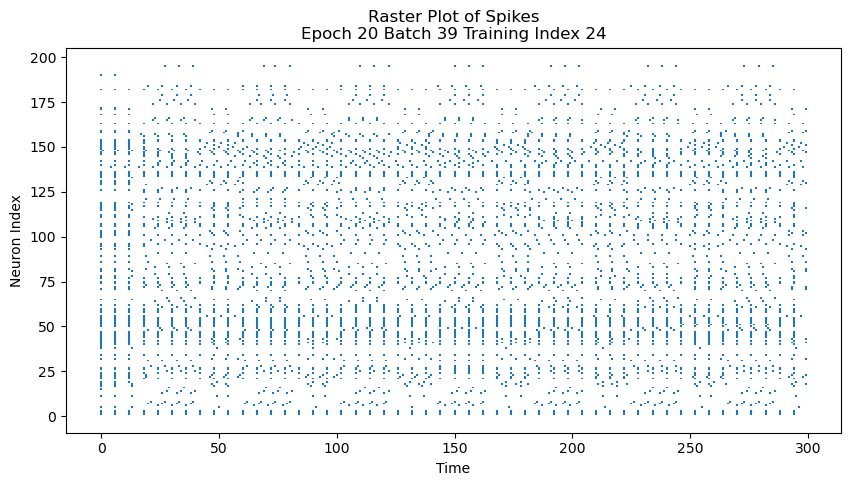

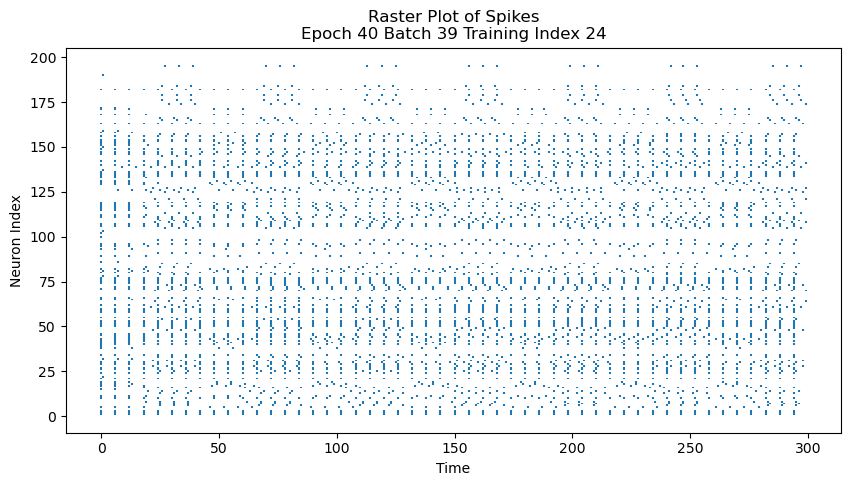

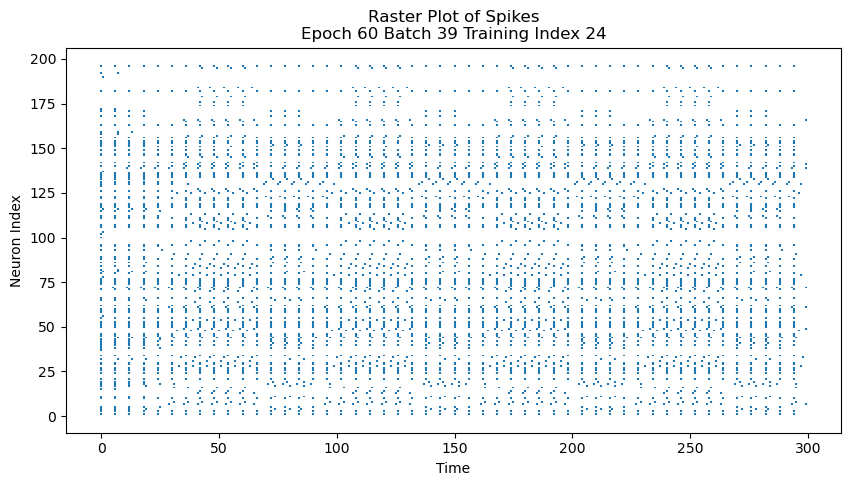

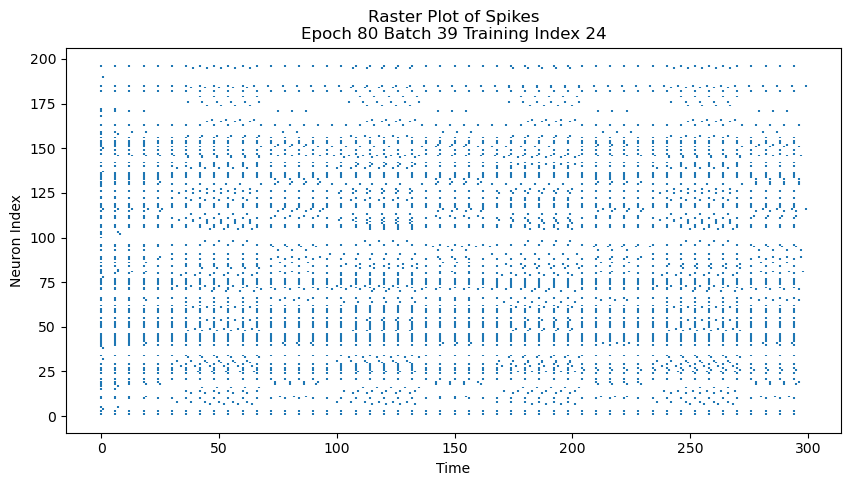

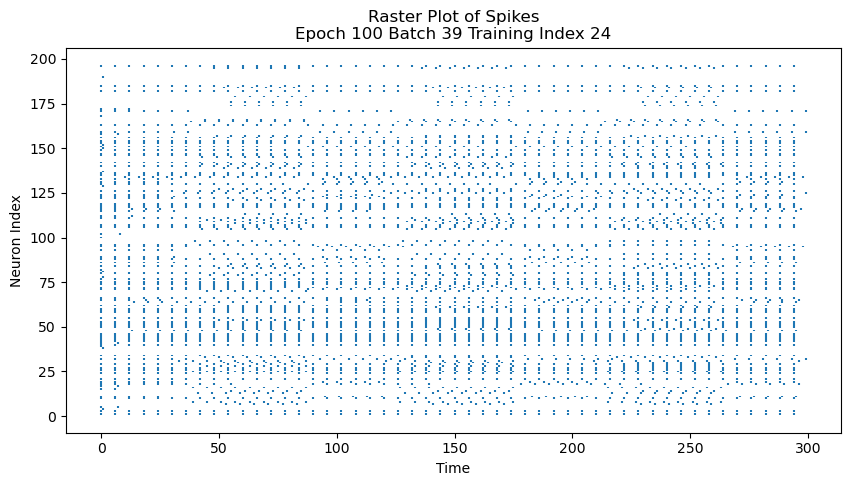

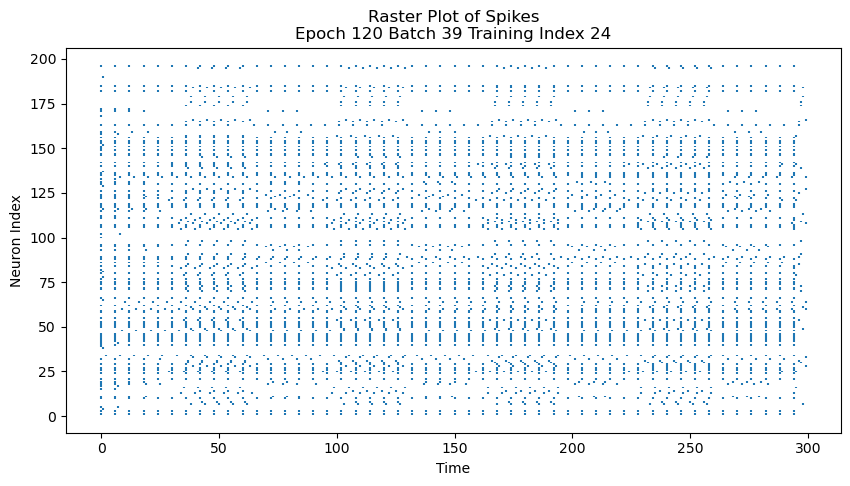

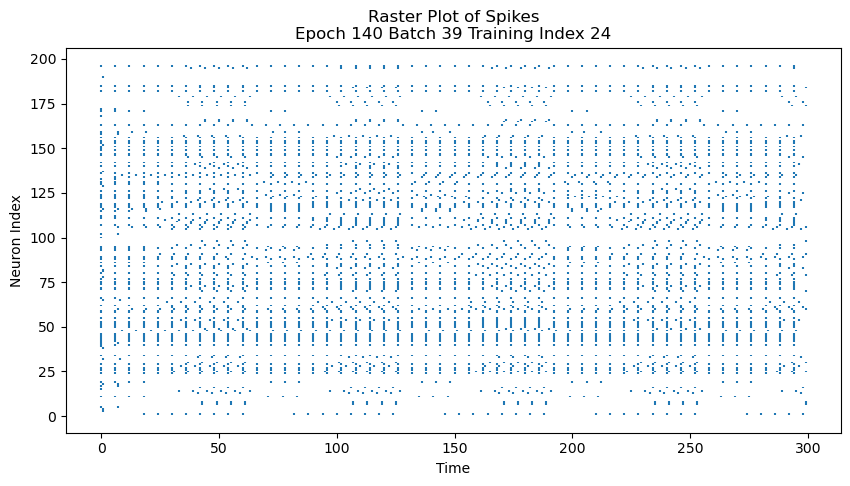

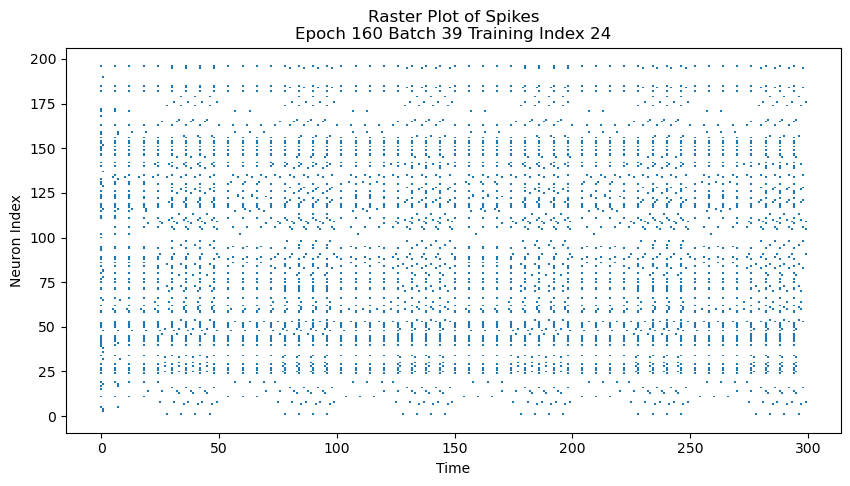

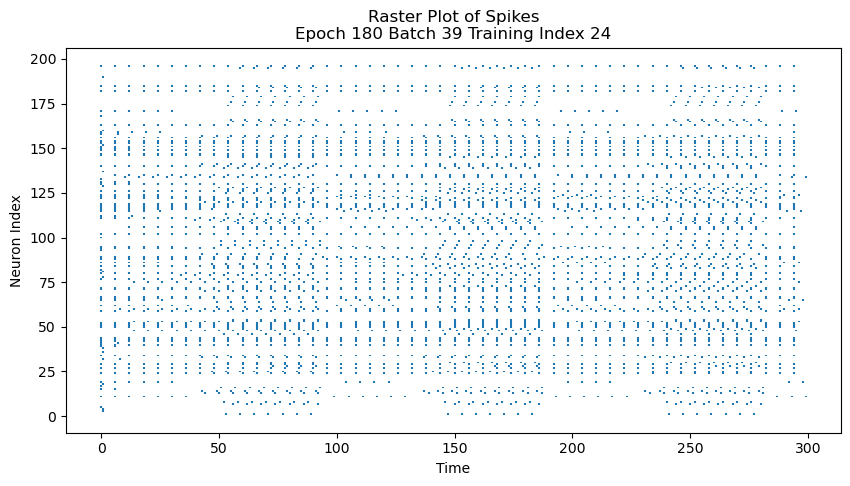

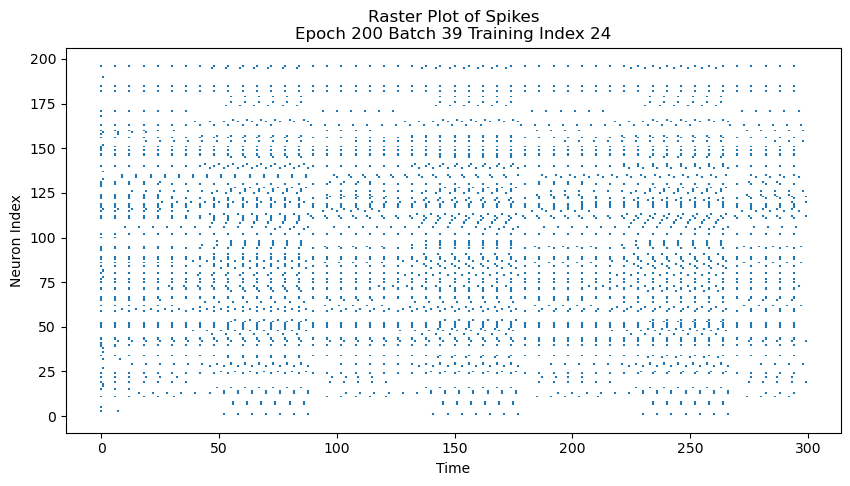

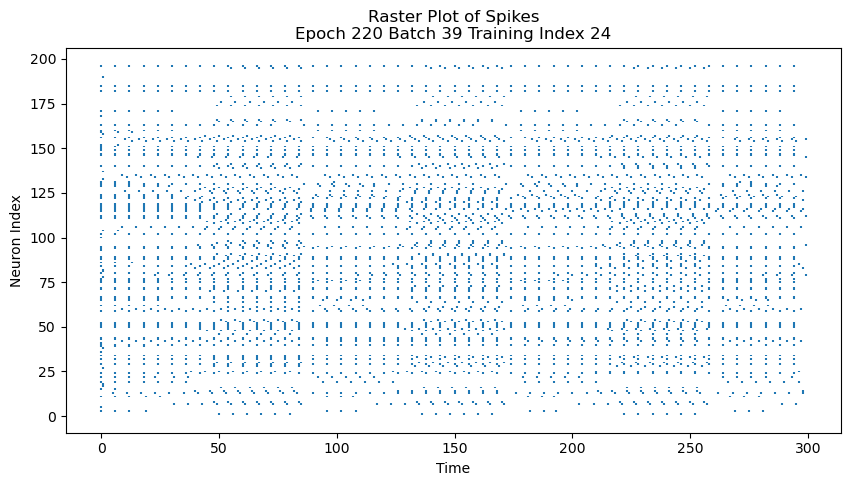

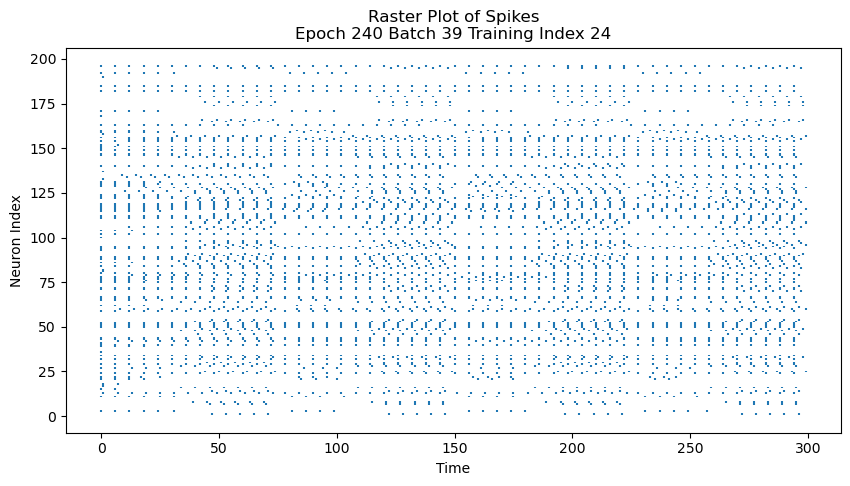

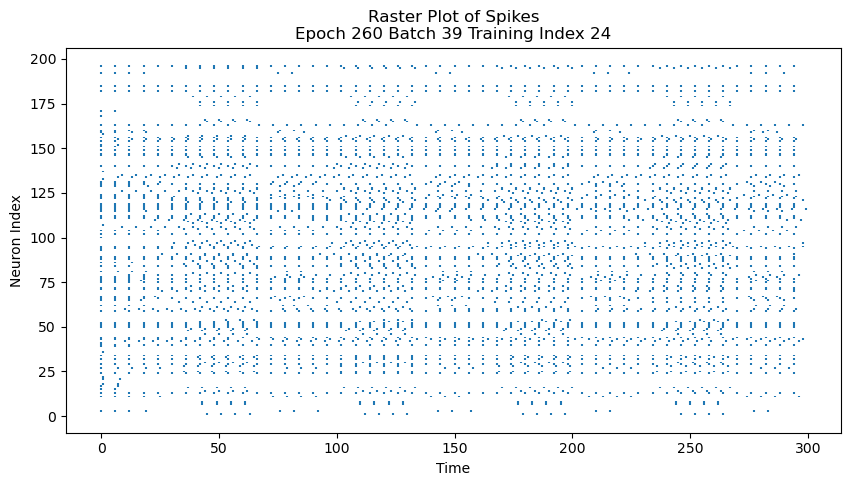

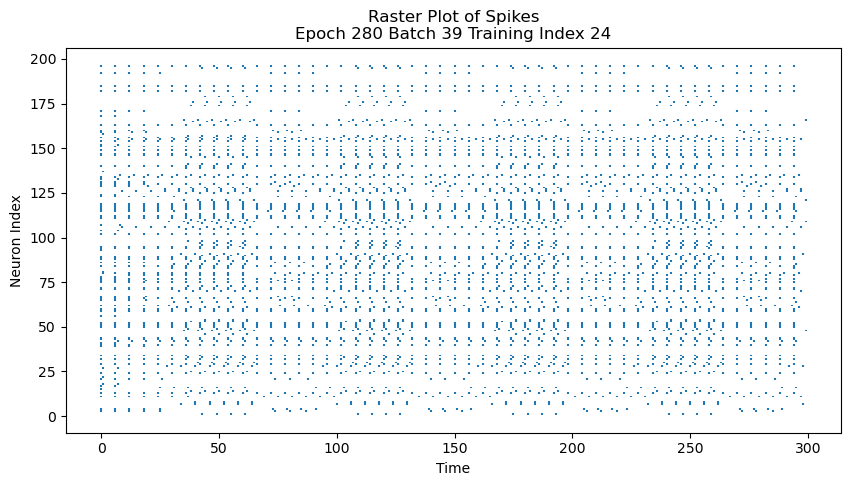

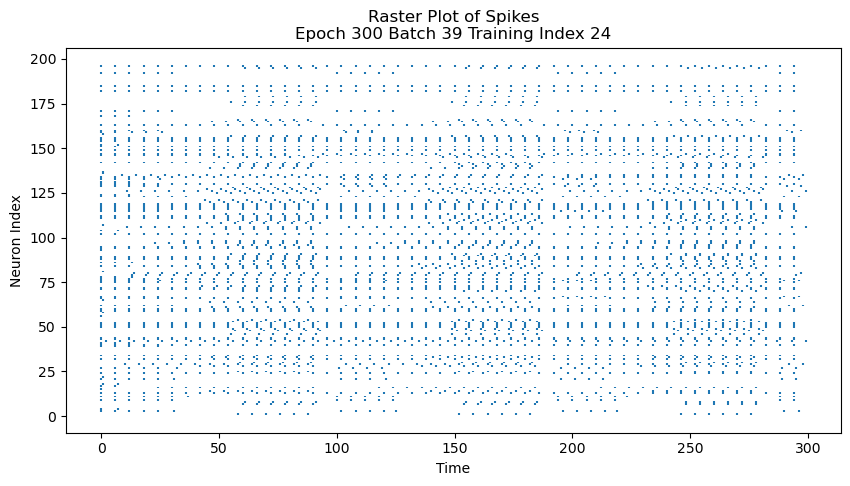

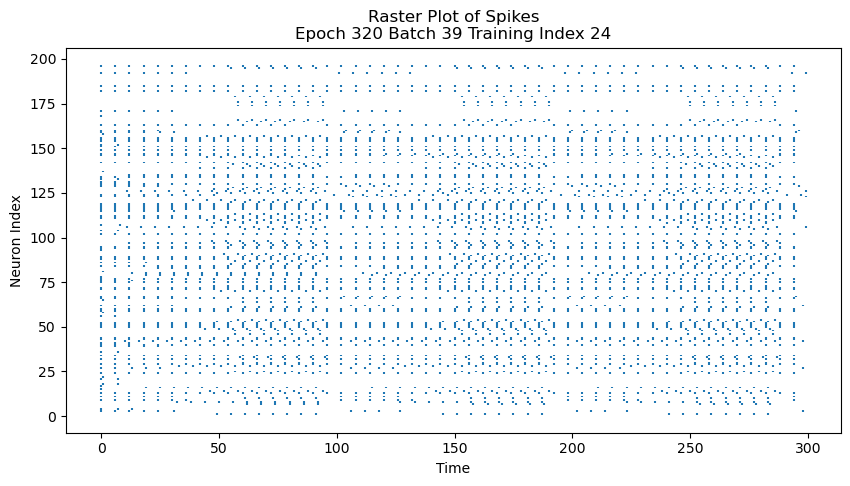

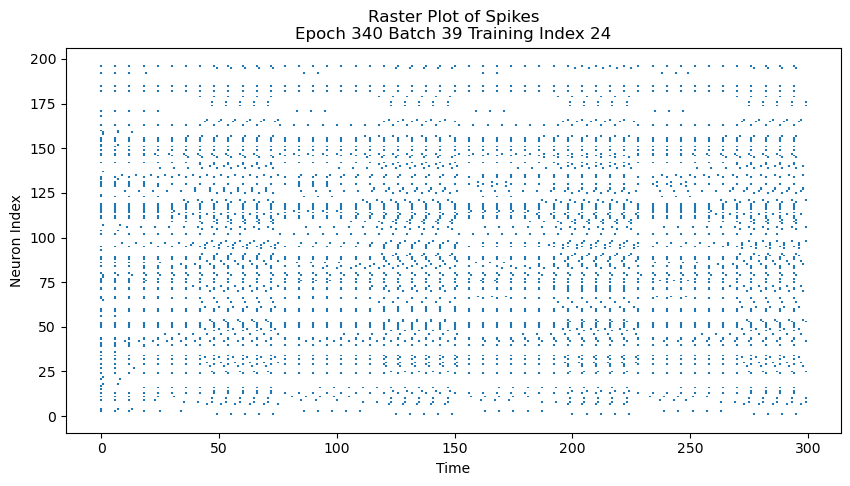

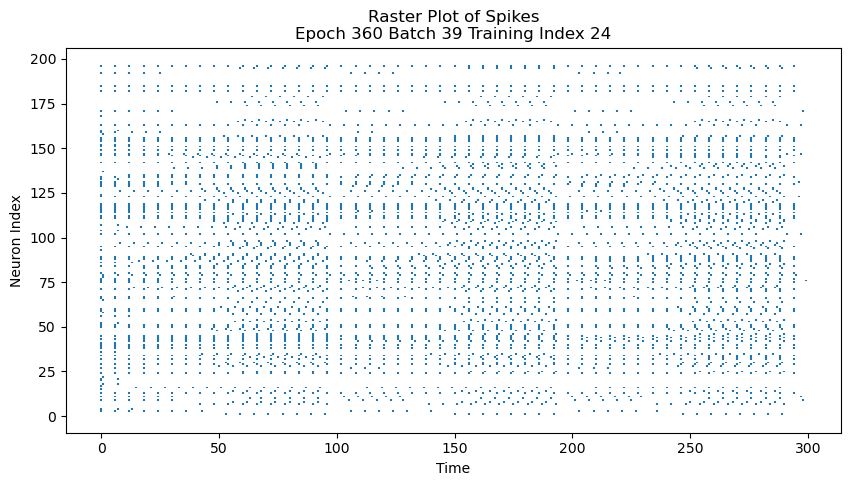

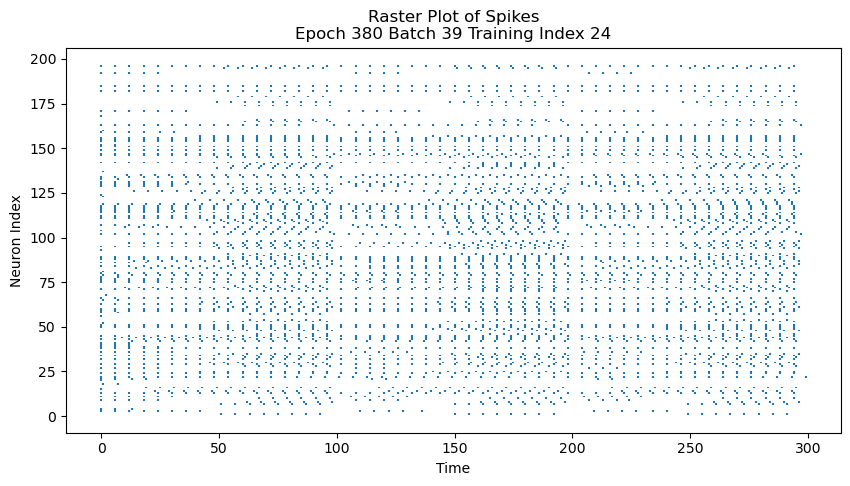

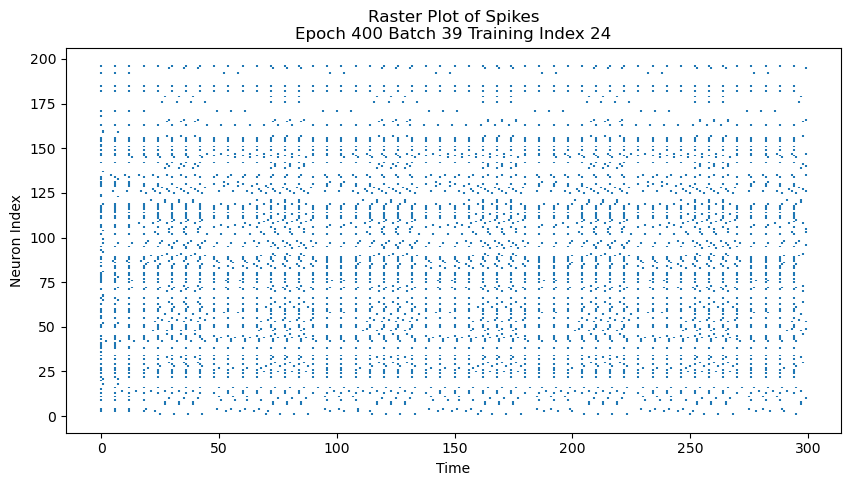

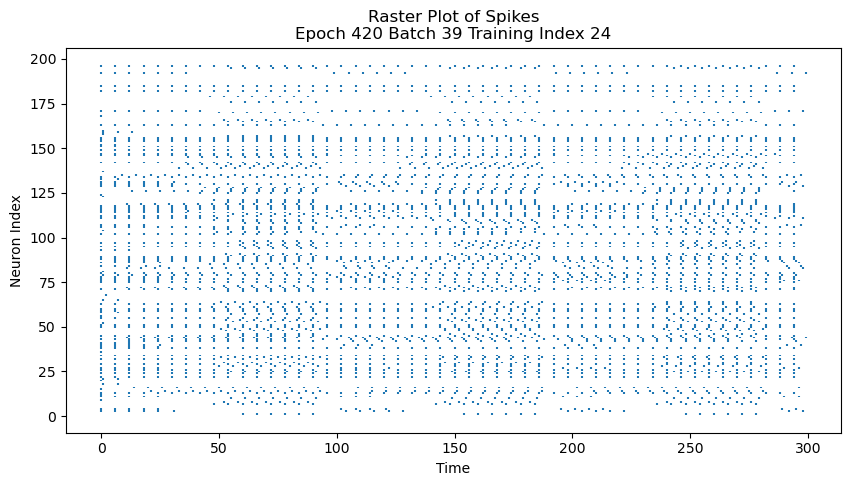

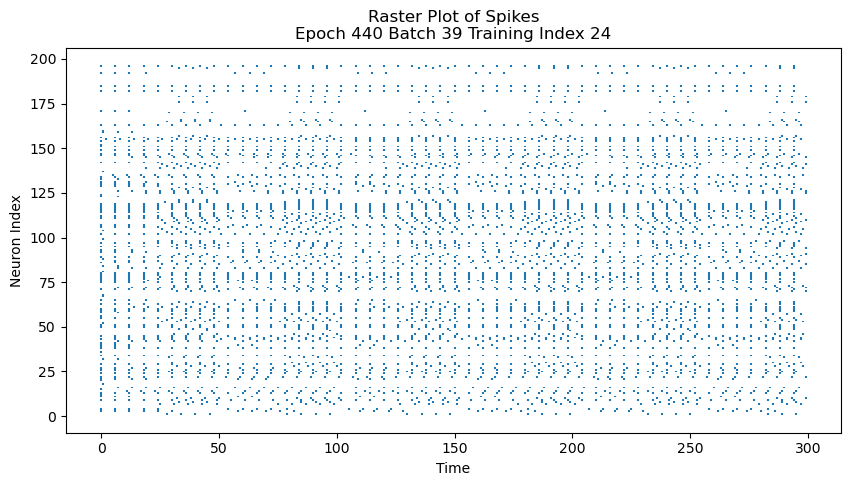

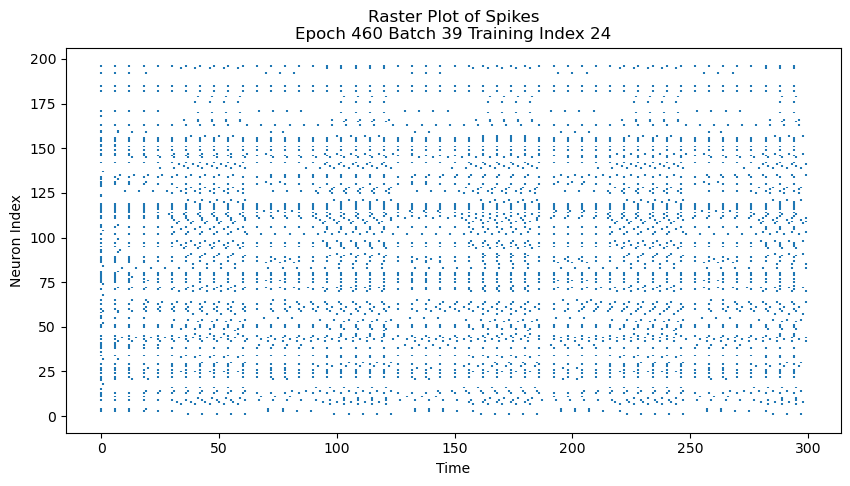

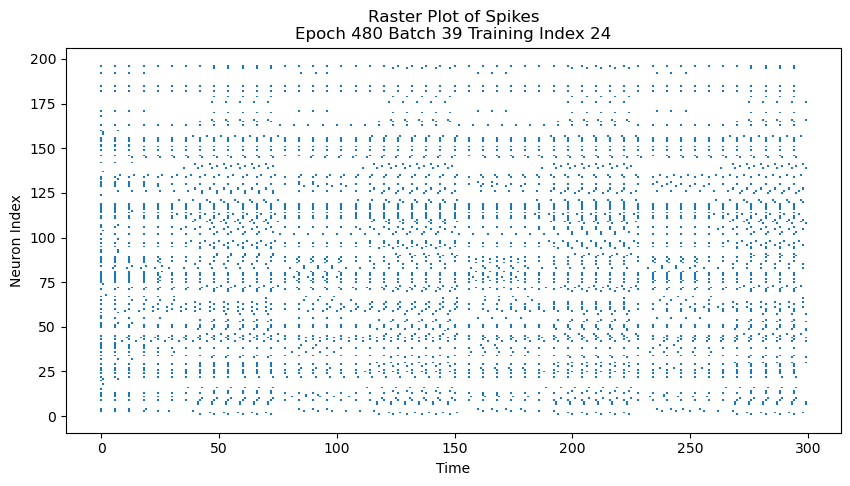

No data for epoch 500.


In [373]:
'''Plots the spike rasters for each 20th epoch'''

# Directory containing the NPZ files
data_dir = 'dataMP'

# Epochs of interest (0, 20, 40, ..., 400)
epochs = range(0, 501, 20)
batch = 39
training_index = 24

# Initialize a list to hold spikes data
spikes_list = []

# Load spikes data from NPZ files
for epoch in epochs:
    file_name = f'level7_loss0_epoch{epoch}_batch{batch}.npz'
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        spikes = data['spikes']
        # Append the spikes of the 24th index training data
        spikes_list.append(spikes)
    else:
        print(f"File {file_name} not found.")

# Plotting the spikes in a raster plot for each 20th epoch
for i, epoch in enumerate(epochs):
    if i < len(spikes_list):
        spikes = spikes_list[i]
        
        plt.figure(figsize=(10, 5))
        for neuron, spike_train in enumerate(spikes):
            spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
            plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)
        
        plt.title(f'Raster Plot of Spikes\nEpoch {epoch} Batch {batch} Training Index {training_index}')
        plt.xlabel('Time')
        plt.ylabel('Neuron Index')
        plt.show()
    else:
        print(f"No data for epoch {epoch}.")


In [371]:
#calculate the total number of inhibitory spikes
file_name = f'level1_loss0_epoch480_batch39.npz'
file_path = os.path.join(data_dir, file_name)
    
data = np.load(file_path)
spikes = torch.from_numpy(data['spikes'])

print(spikes.shape)
print((spikes[160:,:]==1).sum())

In [338]:
# Calculate how many weights increased/decreased drastically
# Function to load weights from npz file
def load_weights(npz_file):
    data = np.load(npz_file)
    rec_weights = data['rec_weights']  # Shape: 200x200
    output_weights = data['output_weights']  # Shape: 1x200
    return rec_weights, output_weights

rec_weights, out_weights =load_weights('dataMP/level2_loss0_epoch480_batch39.npz')
count_above_20 = np.sum(rec_weights > 20)
count_below_40 = np.sum(rec_weights < -20)
    
print("count_above_20",count_above_20, "count_below_20",count_below_40)


count_above_20 240 count_below_20 248


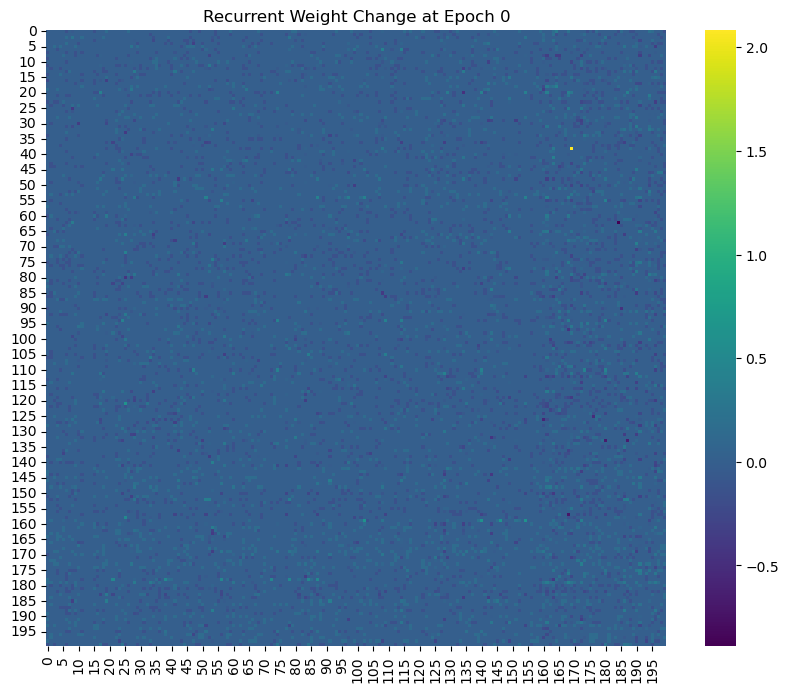

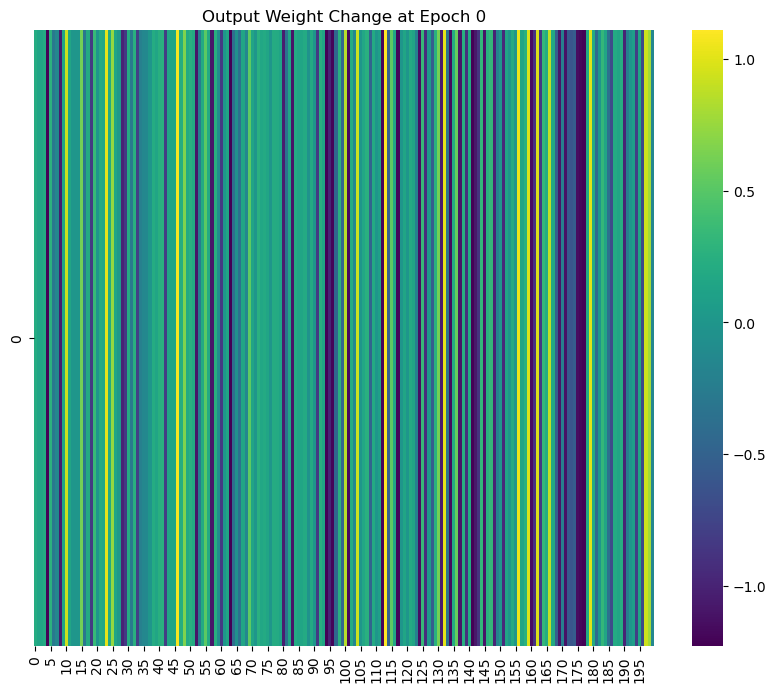

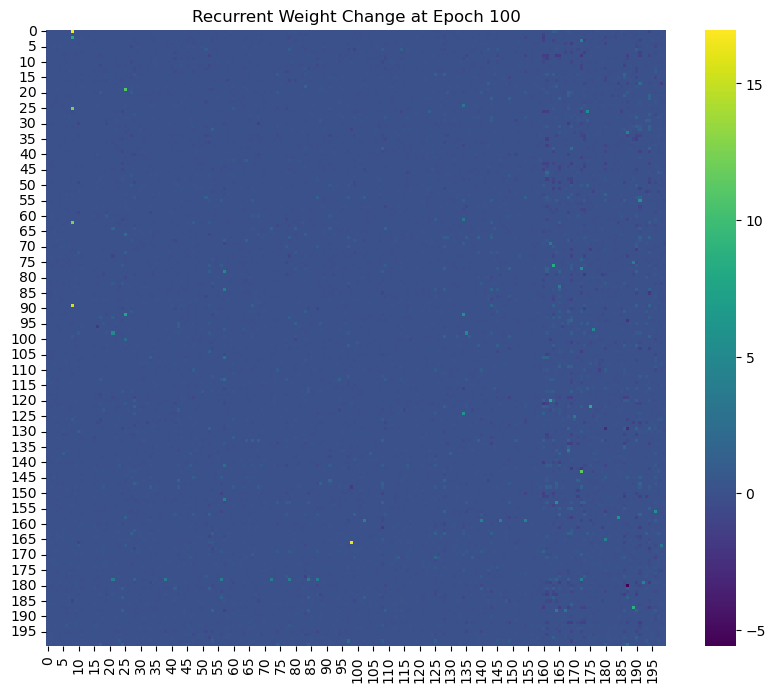

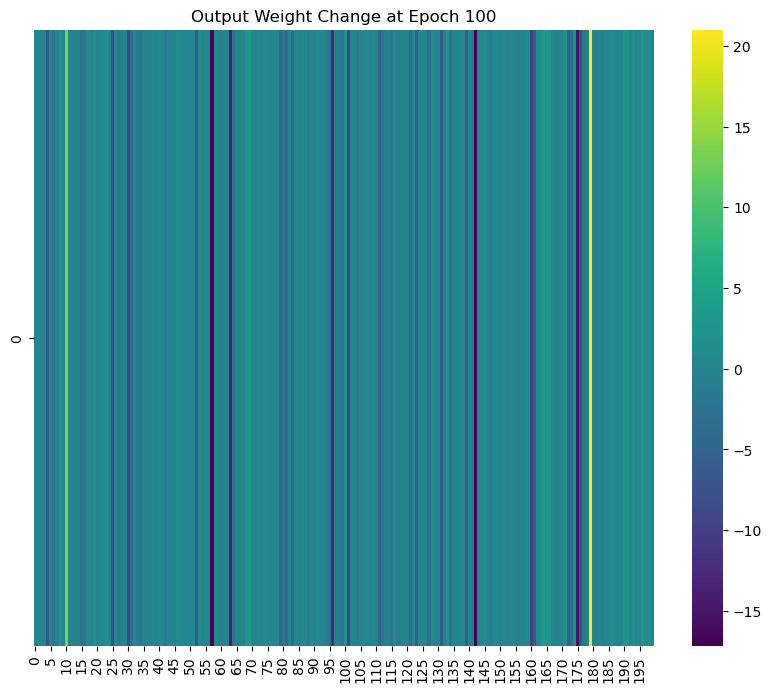

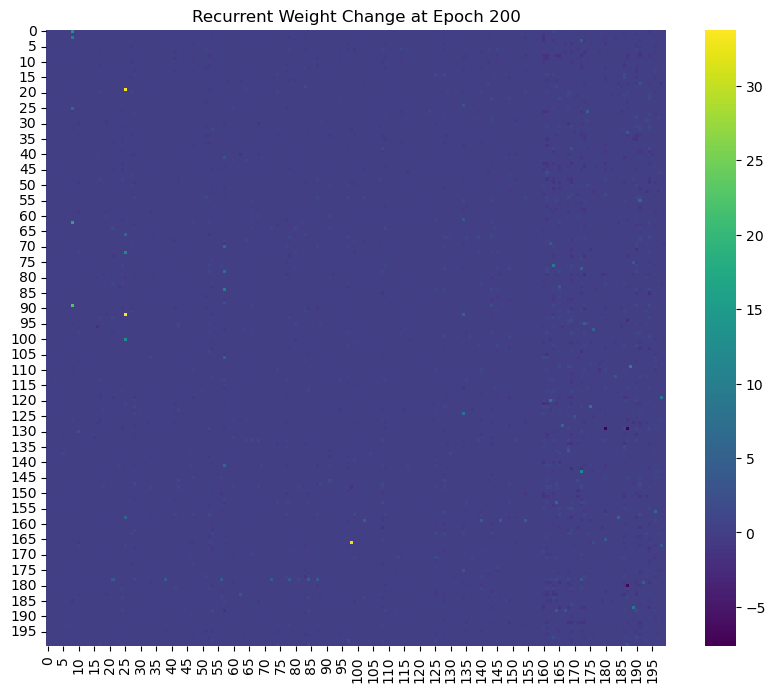

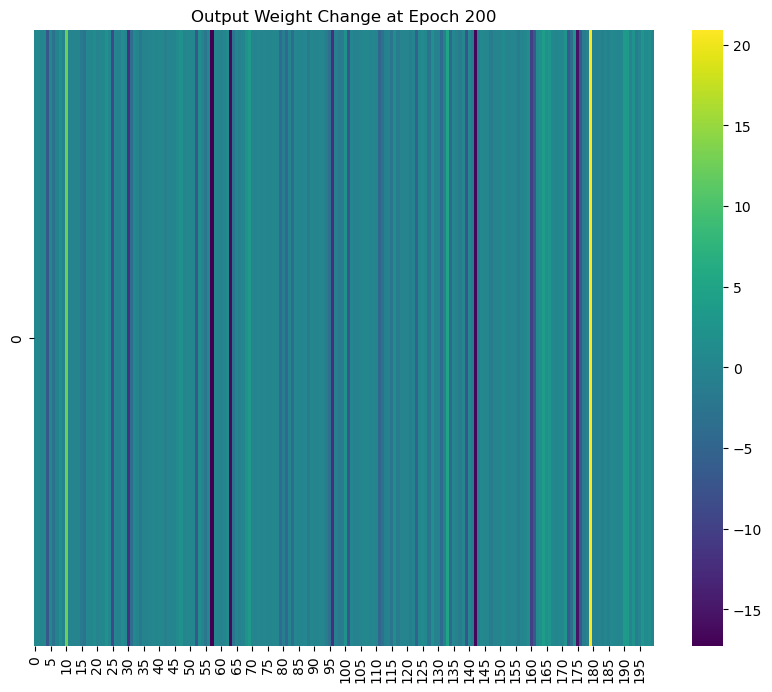

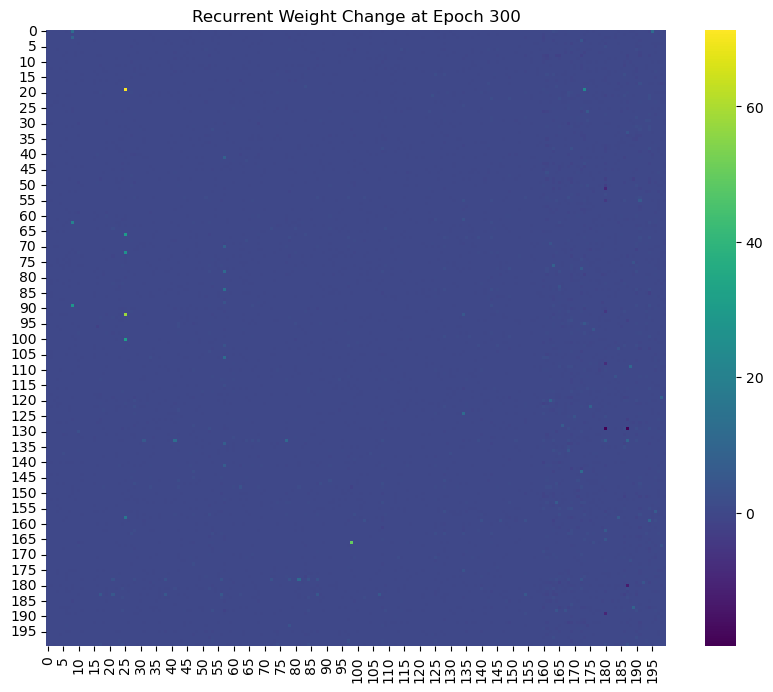

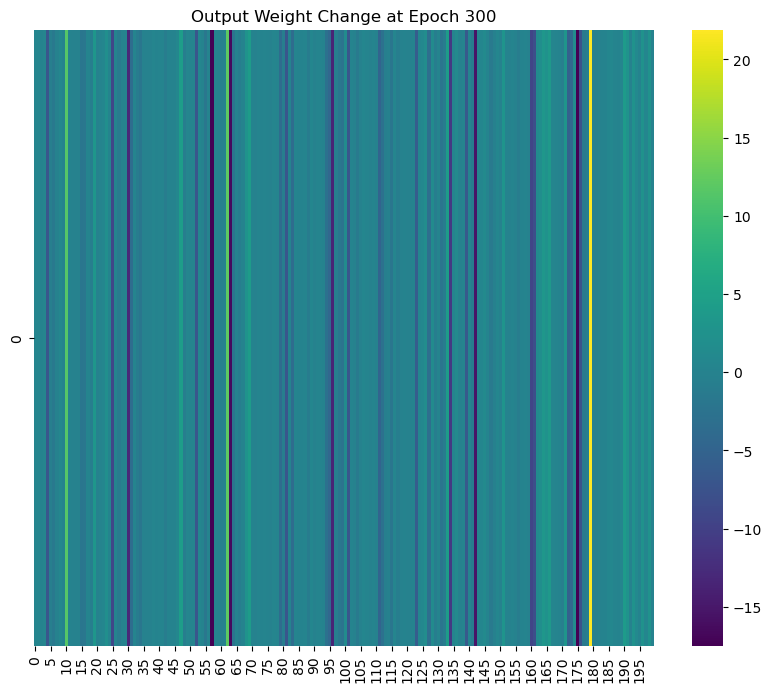

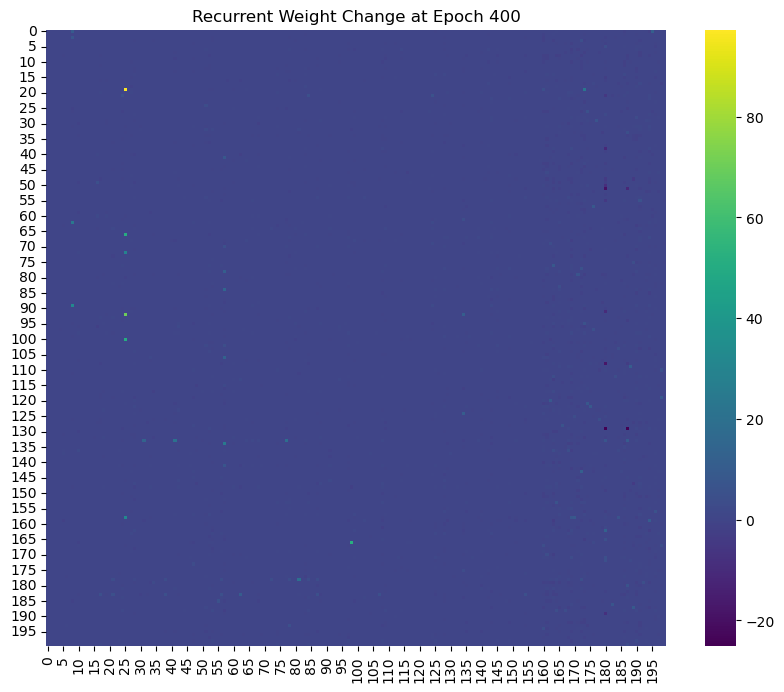

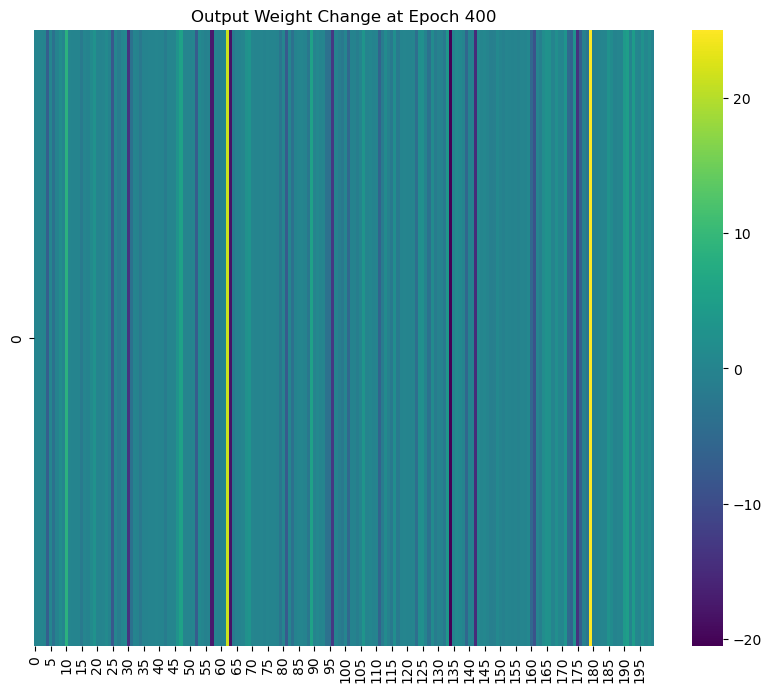

In [172]:
# Plot weight changes (for the recurrent and output layer) between epoch 0th epoch and each next 20th epoch.
# First plot (0-20), second (0-40) ... (0-480)

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store weight differences
rec_weight_diffs = []
output_weight_diffs = []

# Define epochs to compare
epochs_to_compare = range(0, 500, 100)  # From epoch 0 to epoch 400 in steps of 20

# Function to plot heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap="viridis", annot=False)
    plt.title(title)
    plt.show()
    
epoch_file1 = f'dataMP/level8_loss0_epoch0_batch0.npz'
rec_weight1, output_weight1 = load_weights(epoch_file1)
# Load and compare weights for each pair of epochs
for epoch in epochs_to_compare:
    epoch_file2 = f'dataMP/level8_loss0_epoch{epoch}_batch39.npz'  # Assuming batch 19 has the last recorded batch
    # Load weights for epoch
    rec_weight2, output_weight2 = load_weights(epoch_file2)
    
    # Compute the change in weights
    Rec_weight_change = rec_weight2 - rec_weight1
    output_weight_change = output_weight2 - output_weight1

    # Plot heatmaps
    plot_heatmap(Rec_weight_change, f'Recurrent Weight Change at Epoch {epoch}')
    plot_heatmap(output_weight_change, f'Output Weight Change at Epoch {epoch}')



In [374]:
file_name = f'level2_loss0_epoch{480}_batch{39}.npz'
file_path = os.path.join(data_dir, file_name)
    
if os.path.exists(file_path):
    data = np.load(file_path)
    spikes = data['spikes']
    rec_mx = torch.from_numpy(data['rec_weights']).T #200x200
    out_layer = data['output_weights']
    inputs = torch.from_numpy(data['inputs'][-1]).T
    

In [377]:
# helper function that counts num_spikes
def count_ones(tens):
    num_ones = 0
    for i in tens:
        if i == 1: num_ones += 1
    return num_ones

#print period value
print(inputs[1,0])

In [378]:
'''calculate all the neurons that are only active in one state of the sine wave, either positive or negative
(calculate number of phase tuned neurons)

ADJUST DEPENDING ON YOUR PERIOD. 
Each 0th index of a new tuple should be the 
incremented multiple of the period value. Below is an example for period=71'''

positive_ranges = [(0, 28),(71, 88), (142, 147),(213, 206),(284, 206),(236,265),(295,300)]
spikes = torch.from_numpy(spikes)
spikes = spikes.to(torch.int)
# Convert ranges to mask for positive_sine neurons
positive_mask = torch.zeros(300, dtype=torch.bool)
for start, end in positive_ranges:
    positive_mask[start:end+1] = True

# Invert the mask for negative_sine neurons
negative_mask = ~positive_mask

# Lists to store indices of positive_sine and negative_sine neurons
positive_sine_indices = []
negative_sine_indices = []
zero_tensor = torch.zeros(spikes.shape[1])

# Iterate through each neuron
for i in range(spikes.shape[0]):
    neuron_firings = spikes[i, :]

    # Classify the neuron
    if torch.all(neuron_firings == zero_tensor) | count_ones(neuron_firings) < 3:
        pass
    elif torch.all(neuron_firings & positive_mask == neuron_firings)&torch.all(neuron_firings & negative_mask == zero_tensor):
        positive_sine_indices.append(i)
    elif torch.all(neuron_firings & negative_mask == neuron_firings)&torch.all(neuron_firings & positive_mask == zero_tensor):
        negative_sine_indices.append(i)

# Output the results
print("Positive sine neuron indices:", positive_sine_indices)
print("Negative sine neuron indices:", negative_sine_indices)



Positive sine neuron indices: []
Negative sine neuron indices: []


In [365]:
'''Experiment with projections from a single neuron.
Identify state tuned neurons using the code above, replace 179 with the index number
Check for strong weights that the neuron projects.
'''
print(rec_mx[179,:])

# Find the indices where the weight entries are less than -30 (for inhibitory) or more than 30
indices = torch.nonzero(rec_mx[179, :] > 30).squeeze()
indices1 = torch.nonzero(rec_mx[179, :] < -30).squeeze()


# Print the indices
print(indices)
print(indices1)

tensor([  0.0000,   0.0000,   0.0000, -13.5598,   0.0000,  -0.3164,   0.0000,
         -4.3290,   0.0000,   0.0000,  -3.7798,   0.0000,  -6.1385,   0.0000,
          0.0000,   0.0000,  -4.3505,   0.0000,   0.0000,   0.0000,  -4.0334,
         -7.0525,   0.0000,  -4.1352,  -3.6191,   0.0000,   0.0000,   0.0000,
         -0.3813,   0.0000,   0.0000,   0.0000,   0.0000,  -4.2083,   0.0000,
          0.0000,   0.0000,  -1.7714,   0.0000,   0.0000,   0.0000, -10.1608,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,  -4.8787, -11.5507,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
         -6.4931,  -2.0029,  -5.5309,   0.0000,   0.0000,   0.0000,  -3.8702,
         -4.8828,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,  -4.0509,   0.0000,  -1.8669,   0.0000,  -6.5594,
         -6.5518,   0.0000,   0.0000,   0.0000,  -4.0513,   0.00

In [ ]:
# plot a spike raster and try to observe the phase tuned neurons!

plt.figure(figsize=(10, 5))
for neuron, spike_train in enumerate(spikes[:,:]):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch {460} Batch {batch} Training Index 24')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

In [154]:
'''Jitter all 300ms worth of spikes with a number between (-4, 4) '''

import random
pos_neg_indices = sorted(positive_sine_indices + negative_sine_indices)

def generate_nonzero_random():
    while True:
        num = int(random.uniform(-4, 4))  # Generate a random float between -4 and 4
        if num != 0:
            return num
        
spikes1 = torch.zeros([200,300])
for neur in range(spikes1.shape[0]):
    for timestep in range(spikes.shape[1]):
        if spikes[neur,timestep] == 1:
            jitter = generate_nonzero_random()
            if (timestep+jitter >= 0) & (timestep+jitter < 300):
                spikes1[neur,timestep+jitter] = 1
            

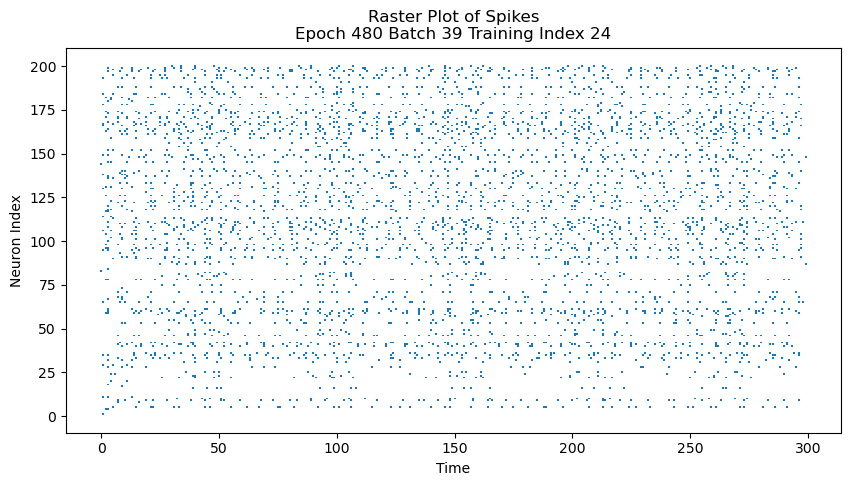

In [155]:
# Scatter plot of jittered spikes
plt.figure(figsize=(10, 5))
for neuron, spike_train in enumerate(spikes1):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch {480} Batch {batch} Training Index 24')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

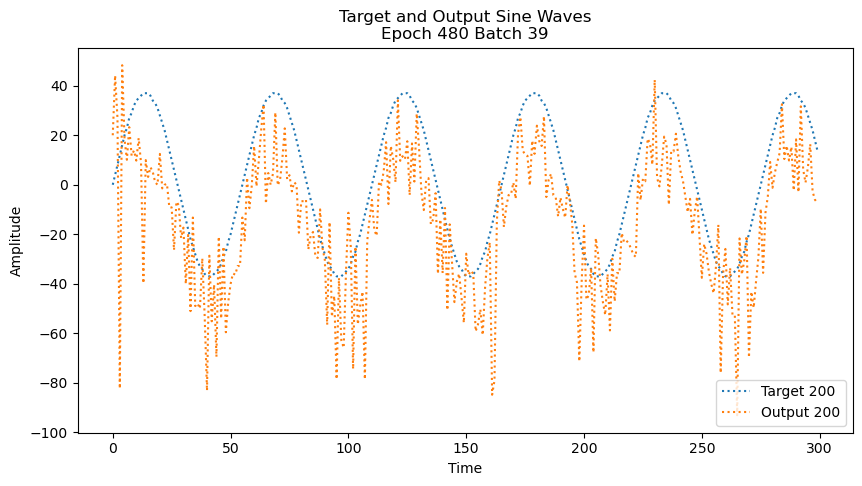

In [156]:
# Plot the output-target pairs with jittered spike to check for robustness
out_layer = torch.from_numpy(out_layer)
out_layer = out_layer.to(float)
spikes1 = spikes1.to(float)
output = torch.matmul(spikes1.T, out_layer.T)
targets = data['targets'][24]
      

# Plotting the target and output sine waves for each epoch
plt.figure(figsize=(10, 5))
plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
plt.plot(output, linestyle='dotted', label=f'Output {i+1}')

plt.title(f'Target and Output Sine Waves\nEpoch 480 Batch {batch}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [158]:
# Instantiate apt variables for the experiment of jittering first 10 ms of spikes

data_dir = 'dataMP'
file_name = 'level51_loss0_epoch480_batch39.npz'
file_path = os.path.join(data_dir, file_name)

if os.path.exists(file_path):
        data = np.load(file_path)
        #shape 200x200 and 1x200,epoch 480, batch 39, training data 24
        l1_mx = torch.from_numpy(data['input_weights']).T  #2x200
        rec_mx = torch.from_numpy(data['rec_weights']).T #200x200
        l2_mx = torch.from_numpy(data['output_weights']).T #200x1
        inputs = torch.from_numpy(data['inputs'][-1]).T
        spikes = torch.from_numpy(data['spikes'])
        targets = data['targets'][-1]
        outputs = data['outputs'][-1]



In [159]:
#Jitter first 10 ms of spikes

spikes1 = torch.zeros([200,300])
# print(spikes[:20,:10])
for neur in range(200):
    for timestep in range(10):
        if spikes[neur,timestep] == 1:
            jitter = generate_nonzero_random()
            # print(jitter)
            if (timestep+jitter >= 0) & (timestep+jitter < 10):
                # spikes1[neur,timestep] = 0
                spikes1[neur,timestep+jitter] = 1

In [160]:
# Instantiate a new RSNN with the already trained model variables 

from classes.helper1 import conn_mx, hid_mx
from classes.RLIF1 import RLIF1
import torch.nn as nn


#set the rec_mx and output layer matrix to already trained model (trained on sinewave0 dataloader train_data_hpc0)
#set the input layer 3x200: first row to first row, and third row to second row of the trained model
class RSNN400(nn.Module):
    def __init__(self):
        super(RSNN400, self).__init__()
        num_inputs = 3
        num_hidden = 200
        num_output = 1
        beta = 0.85
        pe_e = 0.16

        # Define the dimensions
        num_excitatory = 160
        self.num_excitatory = num_excitatory
        num_inhibitory = 40
        self.false_neg = []
        self.false_pos = []

        #input to hidden layer
        # input_hid_mx = conn_mx(num_inputs, num_hidden, pe_e)
        # input_hid_mx= l1_mx 
        # self.input_hid_mx = input_hid_mx
        self.l1 = nn.Linear(num_inputs,num_hidden)
        self.l1.weight.data = l1_mx.T

        # Recurrent layer weight matrix        
        self.rlif1 = RLIF1(reset_mechanism="zero", beta=beta, threshold=1.0,linear_features=num_hidden, all_to_all=True)
        self.rlif1.recurrent.weight.data = rec_mx.T

        #hidden to output layer
        # hid_out_mx = conn_mx(num_hidden,num_output,pe_e)
        self.l2 = nn.Linear(num_hidden, num_output)
        self.l2.weight.data = l2_mx.T
        
        self.spk1_rec = []
        self.cur2_rec = []
        self.spk1,self.mem1 = self.rlif1.init_rleaky()


    def forward(self, inputs, spk1, mem1):
        cur1 = self.l1(inputs)
        spk1, mem1 = self.rlif1(cur1, spk1, mem1)
        cur2 = self.l2(spk1)
        
        self.mem1 = mem1

        return cur2, spk1, mem1

In [161]:
# Initialize spikes and membrane potentials
net_400 = RSNN400()
spk1 = net_400.spk1
mem1 = net_400.mem1
spk_list = []
mem_list = []
spikes1 = spikes1.to(torch.float32)

torch.float32


In [162]:
#jitter the spikes for the first 10 ms, and run the network on jittered initial spikes. 
for i in range(300):
    # print(inputs.dtype)
    if i < 10:
        spk1 = spikes1[:, i]
        net_400.spk1_rec.append(spk1)
        mem1 = net_400.mem1  # Update membrane potential if needed
        cur2, spk1, mem1 = net_400.forward(inputs[:, i], spk1, mem1)
        net_400.cur2_rec.append(cur2)
    else:
        # For the remaining timesteps, run the network normally
        cur2, spk1, mem1 = net_400.forward(inputs[:, i], spk1, mem1)
        net_400.spk1_rec.append(spk1)
        net_400.cur2_rec.append(cur2)

# Convert recorded spikes and currents to tensors
spk1_rec = torch.stack(net_400.spk1_rec).T
cur2_rec = torch.stack(net_400.cur2_rec)

torch.Size([200, 300])


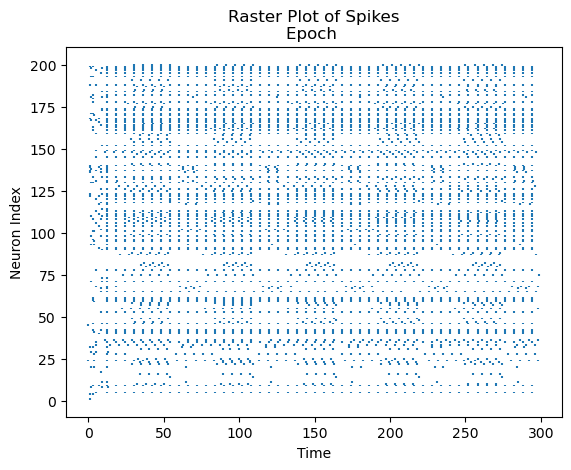

In [163]:
# Plot the spike raster with 10 ms jittered spikes
print(spk1_rec.shape)

for neuron, spike_train in enumerate(spk1_rec):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch ')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

In [164]:
l2_mx = l2_mx.to(float)
spk1_rec = spk1_rec.to(float)
output = torch.matmul(spk1_rec.T, l2_mx)
targets = data['targets'][24]

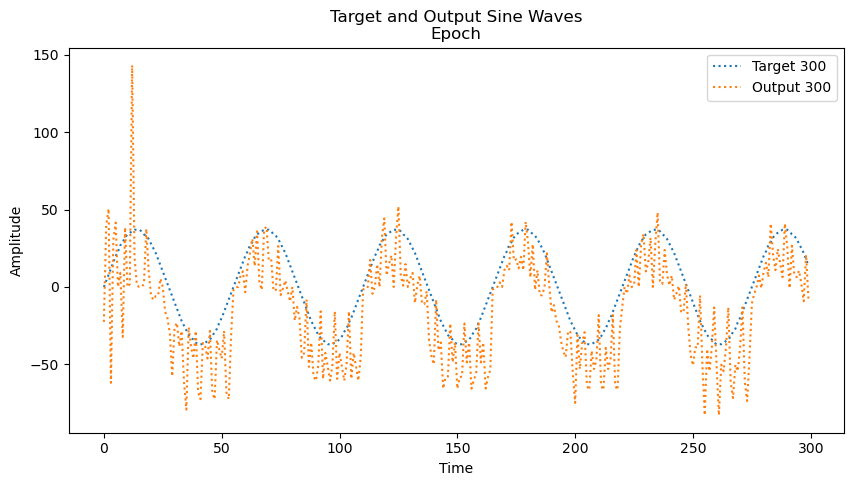

In [165]:
#plot the target-output pairs for the output of jittered spikes
output = output.squeeze().detach().numpy()

plt.figure(figsize=(10, 5))
plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
plt.plot(output, linestyle='dotted', label=f'Output {i+1}')

plt.title(f'Target and Output Sine Waves\nEpoch')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()